In [ ]:
import pandas as pd

data = pd.read_csv('Telkom Samples.csv')

# Menyisakan hanya kolom SYMPTOM dan TTR END TO END pada DataFrame
data = data[['SYMPTOM', 'TTR END TO END']]

# Menyimpan hasil ke file CSV baru
data.to_csv('filtered_data.csv', index=False)
print("File filtered_data.csv berhasil disimpan.")

File filtered_data.csv berhasil disimpan.


Preprocessing dan Cleaning

In [ ]:
import pandas as pd

data1 = pd.read_csv('filtered_data.csv')
data1

,SYMPTOM,TTR END TO END
0,null | | ACCESS - Kabel Terjuntai,1:27:14
1,null | | ACCESS - ODP / ODC Terbuka,1:03:30
2,null | | ACCESS - ODP / ODC Terbuka,2:54:33
3,null | | ACCESS - ODP / ODC Terbuka,2:56:13
4,null | | ACCESS - Kabel Terjuntai,0:37:18
...,...,...
15017,null | | ACCESS - Kabel Terjuntai,21:44:20
15018,null | | ACCESS - ODP / ODC Terbuka,22:27:06
15019,null | | ACCESS - ODP / ODC Terbuka,4:16:04
15020,null | | ACCESS - Kabel Terjuntai,23:29:29


In [ ]:
import re
import numpy as np

data1['SYMPTOM'] = data1['SYMPTOM'].str.replace(r'null \| \| ACCESS -', '', regex=True)

# Mengonversi kolom 'TTR END TO END' dari format string waktu ke dalam menit
data1['TTR END TO END'] = pd.to_timedelta(data1['TTR END TO END']).dt.total_seconds() / 60

# Menghapus baris yang berisi NA atau inf di kolom 'TTR END TO END'
data1 = data1[~data1['TTR END TO END'].isin([np.nan, np.inf, -np.inf])]

# Mengubah nilai dalam kolom 'TTR END TO END' menjadi bilangan bulat
data1['TTR END TO END'] = data1['TTR END TO END'].round().astype(int)

data1

<ipython-input-3-6bd5fade9b95>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['TTR END TO END'] = data1['TTR END TO END'].round().astype(int)


,SYMPTOM,TTR END TO END
0,Kabel Terjuntai,87
1,ODP / ODC Terbuka,64
2,ODP / ODC Terbuka,175
3,ODP / ODC Terbuka,176
4,Kabel Terjuntai,37
...,...,...
15017,Kabel Terjuntai,1304
15018,ODP / ODC Terbuka,1347
15019,ODP / ODC Terbuka,256
15020,Kabel Terjuntai,1409


In [ ]:
# Mengisi nilai yang hilang dengan metode forward fill atau nilai tertentu
data1.fillna(method='ffill', inplace=True)

# Atau, menghapus baris yang memiliki nilai hilang
data1.dropna(inplace=True)

print(data1.isnull().sum())

SYMPTOM           0
TTR END TO END    0
dtype: int64


<ipython-input-4-039bbe39f7ea>:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data1.fillna(method='ffill', inplace=True)
<ipython-input-4-039bbe39f7ea>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1.fillna(method='ffill', inplace=True)
<ipython-input-4-039bbe39f7ea>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1.dropna(inplace=True)


In [ ]:
# Menyimpan hasil ke file CSV baru
data1.to_csv('cleaned.csv', index=False)
print("File cleaned.csv berhasil disimpan.")

File cleaned.csv berhasil disimpan.


Hierarchical Clustering

In [ ]:
import pandas as pd
import numpy as np
from scipy.cluster.hierarchy import linkage, dendrogram, cophenet
from scipy.spatial.distance import pdist
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler

data2 = pd.read_csv('cleaned.csv')

# Encoding kolom string dalam DataFrame data1
label_encoders = {}
for column in data2.columns:
    if data2[column].dtype == 'object':
        le = LabelEncoder()
        data2[column] = le.fit_transform(data2[column])
        label_encoders[column] = le

# Normalisasi data menggunakan StandardScaler
scaler = StandardScaler()
data_normalized = scaler.fit_transform(data2)

# Mengonversi kembali ke DataFrame
data_normalized = pd.DataFrame(data_normalized, columns=data2.columns)

# Menyimpan hasil ke file CSV baru
data_normalized.to_csv('filtered_data_normalized.csv', index=False)
print("File filtered_data_normalized.csv berhasil disimpan.")

File filtered_data_normalized.csv berhasil disimpan.


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


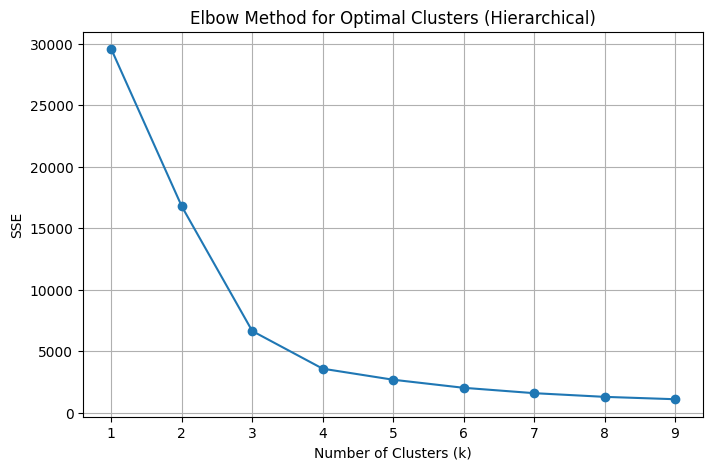

In [ ]:
from scipy.cluster.hierarchy import linkage, dendrogram, cophenet, fcluster

# Calculate SSE for determining optimal number of clusters using Elbow Method
sse = []
linkage_matrix = linkage(data_normalized, method='ward', metric='euclidean')
for k in range(1, 10):
    clusters = fcluster(linkage_matrix, k, criterion='maxclust')
    sse.append(np.sum([np.sum((data_normalized[clusters == c] - np.mean(data_normalized[clusters == c], axis=0))**2) for c in np.unique(clusters)]))

# Plot SSE Elbow Method
plt.figure(figsize=(8, 5))
plt.plot(range(1, 10), sse, marker='o')
plt.title('Elbow Method for Optimal Clusters (Hierarchical)')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('SSE')
plt.grid()
plt.show()

In [ ]:
# Display SSE values in a table
sse_table = pd.DataFrame({
    'Number of Clusters (k)': range(1, 10),
    'SSE': sse
})
print(sse_table)

   Number of Clusters (k)           SSE
0                       1  29542.000000
1                       2  16770.331366
2                       3   6645.308360
3                       4   3584.441165
4                       5   2687.559274
5                       6   2032.538670
6                       7   1596.114934
7                       8   1296.672648
8                       9   1103.944721


In [ ]:
# Perform hierarchical clustering
methods = ['single', 'average', 'complete', 'ward']
linkage_matrices = {}

for method in methods:
    linkage_matrices[method] = linkage(data_normalized, method=method, metric='euclidean')

# Display clusters for each method
for method in methods:
    clusters = fcluster(linkage_matrices[method], 3, criterion='maxclust')  # Example: 3 clusters
    print(f"Clusters for {method.capitalize()} Linkage:")
    print(pd.DataFrame({'Sample Index': range(len(clusters)), 'Cluster': clusters}))
    print()

Clusters for Single Linkage:
       Sample Index  Cluster
0                 0        1
1                 1        1
2                 2        1
3                 3        1
4                 4        1
...             ...      ...
14766         14766        1
14767         14767        1
14768         14768        1
14769         14769        1
14770         14770        1

[14771 rows x 2 columns]

Clusters for Average Linkage:
       Sample Index  Cluster
0                 0        2
1                 1        2
2                 2        2
3                 3        2
4                 4        2
...             ...      ...
14766         14766        2
14767         14767        2
14768         14768        2
14769         14769        2
14770         14770        2

[14771 rows x 2 columns]

Clusters for Complete Linkage:
       Sample Index  Cluster
0                 0        2
1                 1        2
2                 2        2
3                 3        2
4              

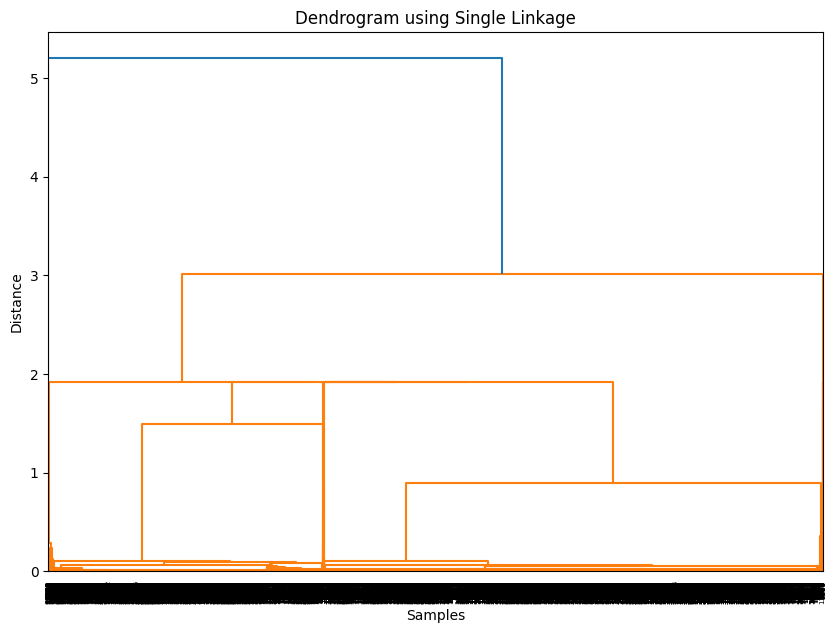

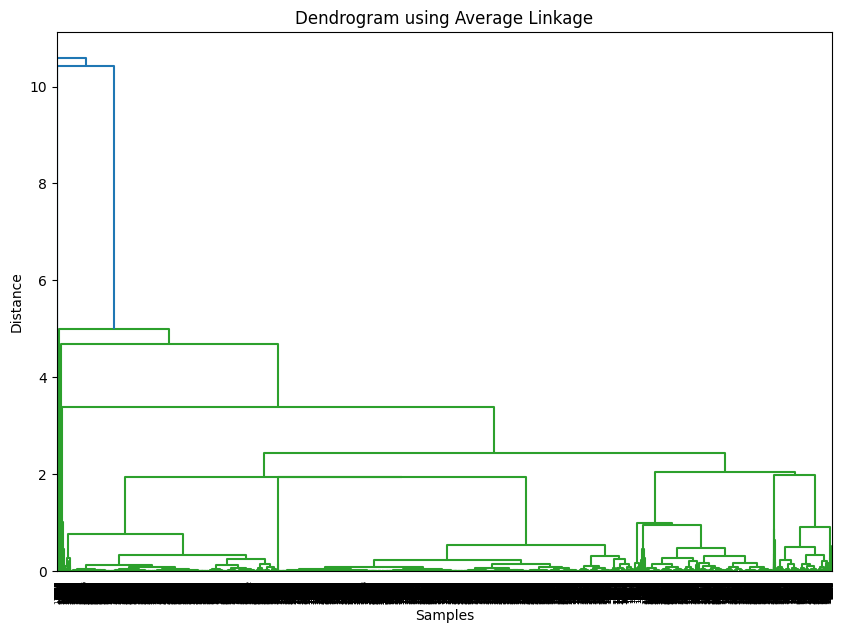

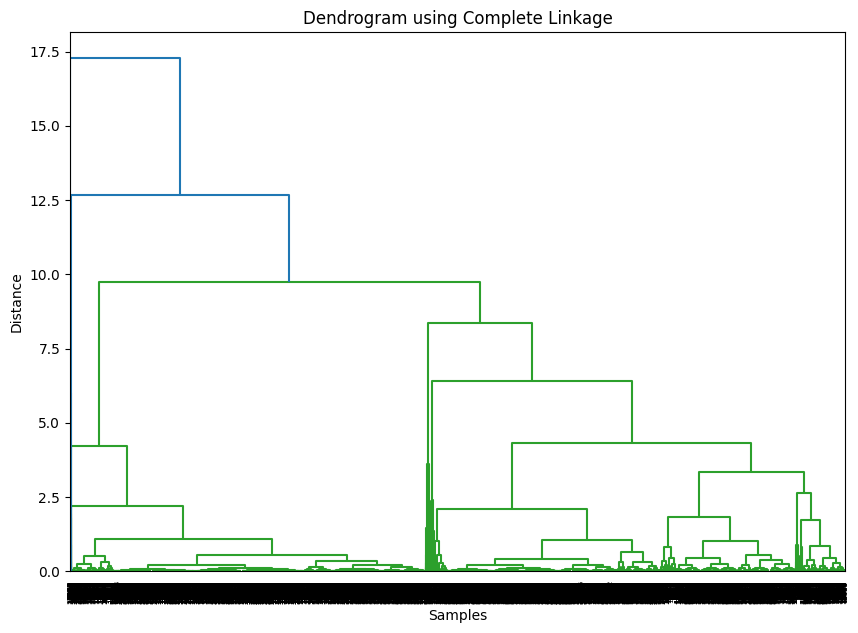

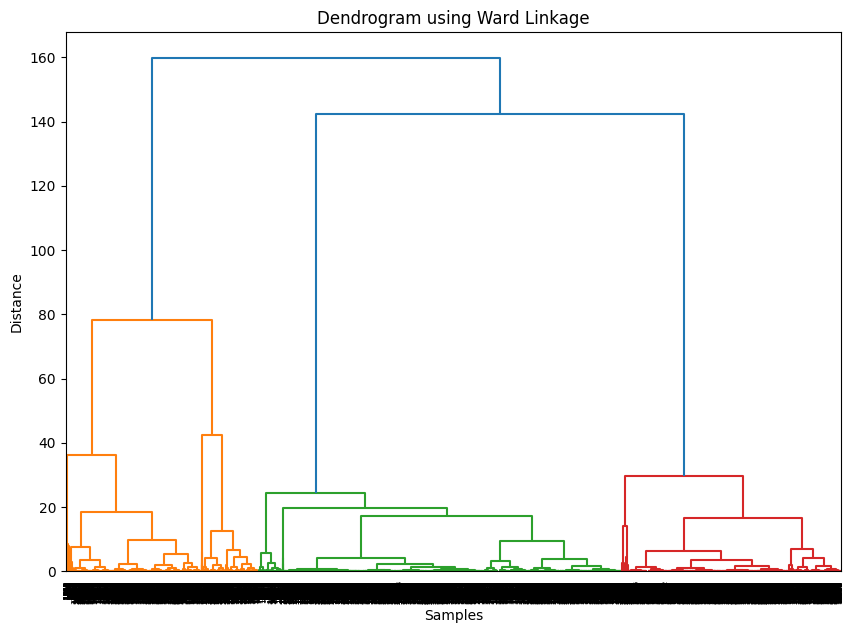

In [ ]:
# Plot dendrograms
for method in methods:
    plt.figure(figsize=(10, 7))
    dendrogram(linkage_matrices[method])
    plt.title(f'Dendrogram using {method.capitalize()} Linkage')
    plt.xlabel('Samples')
    plt.ylabel('Distance')
    plt.show()

In [ ]:
# Calculate Cophenetic Correlation Coefficient
for method in methods:
    coph_corr, _ = cophenet(linkage_matrices[method], pdist(data_normalized))
    print(f'Cophenetic Correlation Coefficient ({method.capitalize()} Linkage): {coph_corr:.4f}')

Cophenetic Correlation Coefficient (Single Linkage): 0.6388
Cophenetic Correlation Coefficient (Average Linkage): 0.9379
Cophenetic Correlation Coefficient (Complete Linkage): 0.7006
Cophenetic Correlation Coefficient (Ward Linkage): 0.8325


In [ ]:
# Perform Agglomerative Hierarchical Clustering using Average Linkage
linkage_matrix = linkage(data_normalized, method='average', metric='euclidean')

# Assign clusters (example: 3 clusters)
num_clusters = 3
clusters = fcluster(linkage_matrix, num_clusters, criterion='maxclust')

# Instead of using the original 'data', use 'data2' (which has been preprocessed)
data2['Cluster'] = clusters  # Assign clusters to data2

# Profiling clusters
cluster_summary = data2.groupby('Cluster').agg(
    N=('Cluster', 'size'),
    CH=('SYMPTOM', 'mean'),
    KP=('SYMPTOM', 'sum'),
    RB=('TTR END TO END', 'min'),
    KM=('TTR END TO END', 'mean'),
    RT=('TTR END TO END', 'max')
).reset_index()

# Rename columns for clarity
cluster_summary.rename(columns={
    'CH': 'Rata-rata SYMPTOM',
    'KP': 'Total SYMPTOM',
    'RB': 'Min TTR END TO END',
    'KM': 'Rata-rata TTR END TO END',
    'RT': 'Max TTR END TO END'
}, inplace=True)

# Print cluster summary
table = cluster_summary
print(table)

   Cluster      N  Rata-rata SYMPTOM  Total SYMPTOM  Min TTR END TO END  \
0        1     11           7.727273             85                 206   
1        2  14759           2.360390          34837                   0   
2        3      1           2.000000              2                5737   

   Rata-rata TTR END TO END  Max TTR END TO END  
0                959.636364                1290  
1                409.968968                3154  
2               5737.000000                5737  


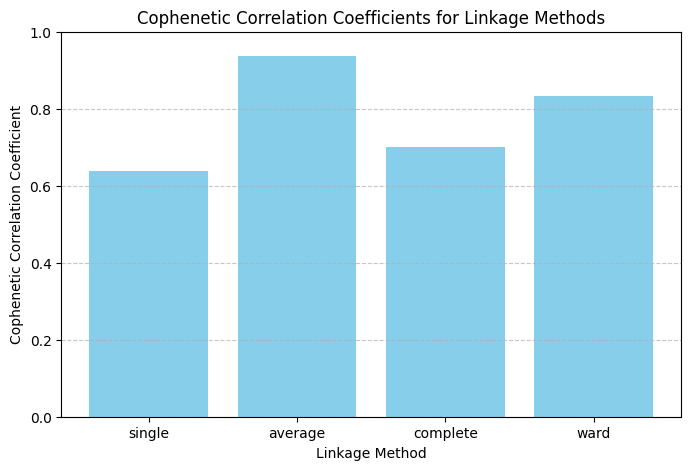

In [ ]:
cophenetic_corrs = []
for method in methods:
    linkage_matrix = linkage(data_normalized, method=method, metric='euclidean')
    coph_corr, _ = cophenet(linkage_matrix, pdist(data_normalized))
    cophenetic_corrs.append(coph_corr)

# Create a bar plot for Cophenetic Correlation Coefficients
plt.figure(figsize=(8, 5))
plt.bar(methods, cophenetic_corrs, color='skyblue')
plt.title('Cophenetic Correlation Coefficients for Linkage Methods')
plt.xlabel('Linkage Method')
plt.ylabel('Cophenetic Correlation Coefficient')
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [ ]:
# Perform hierarchical clustering using average linkage
linkage_matrix = linkage(data_normalized, method='average', metric='euclidean')
linkage_matrix

array([[0.00000000e+00, 4.61000000e+02, 0.00000000e+00, 2.00000000e+00],
       [1.00000000e+00, 1.36600000e+03, 0.00000000e+00, 2.00000000e+00],
       [2.00000000e+00, 5.60200000e+03, 0.00000000e+00, 2.00000000e+00],
       ...,
       [2.95300000e+04, 2.95370000e+04, 4.99387033e+00, 1.47590000e+04],
       [2.95350000e+04, 2.95380000e+04, 1.04320721e+01, 1.47700000e+04],
       [1.18700000e+03, 2.95390000e+04, 1.05916402e+01, 1.47710000e+04]])

In [ ]:
# Assign clusters (3 clusters)
num_clusters = 2
clusters = fcluster(linkage_matrix, num_clusters, criterion='maxclust')

# Instead of using the original 'data', use 'data2' (which has been preprocessed)
data_normalized['Cluster'] = clusters

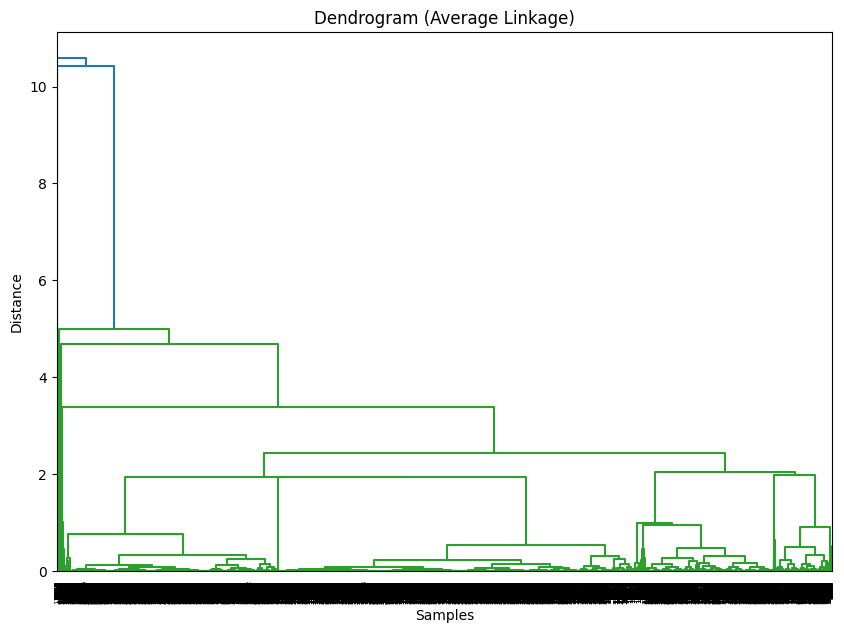

,SYMPTOM,TTR END TO END,Cluster
0,-0.698521,-0.639506,1
1,1.218584,-0.684939,1
2,1.218584,-0.465673,1
3,1.218584,-0.463697,1
4,-0.698521,-0.738275,1
...,...,...,...
14766,-0.698521,1.764525,1
14767,1.218584,1.849467,1
14768,1.218584,-0.305667,1
14769,-0.698521,1.971940,1


In [ ]:
# Plot dendrogram
plt.figure(figsize=(10, 7))
dendrogram(linkage_matrix)
plt.title('Dendrogram (Average Linkage)')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()

data_normalized

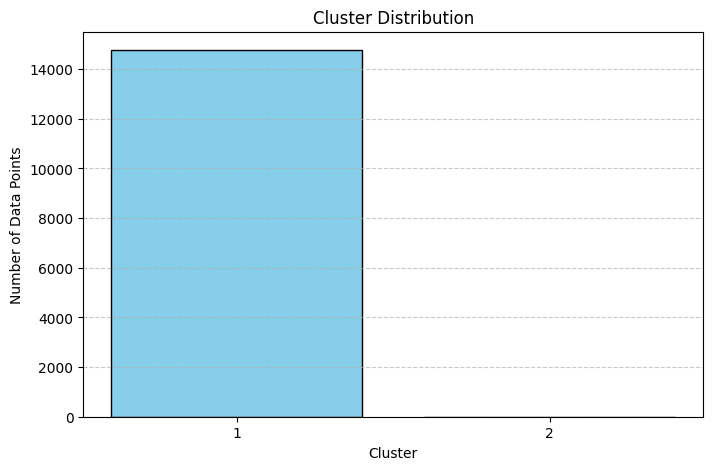

Cluster Counts:
1    14770
2        1
Name: count, dtype: int64


In [ ]:
cluster_counts = pd.Series(clusters).value_counts().sort_index()

plt.figure(figsize=(8, 5))
plt.bar(cluster_counts.index, cluster_counts.values, color='skyblue', edgecolor='black')
plt.title("Cluster Distribution")
plt.xlabel("Cluster")
plt.ylabel("Number of Data Points")
plt.xticks(cluster_counts.index)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Optional: Print Cluster Counts
print("Cluster Counts:")
print(cluster_counts)

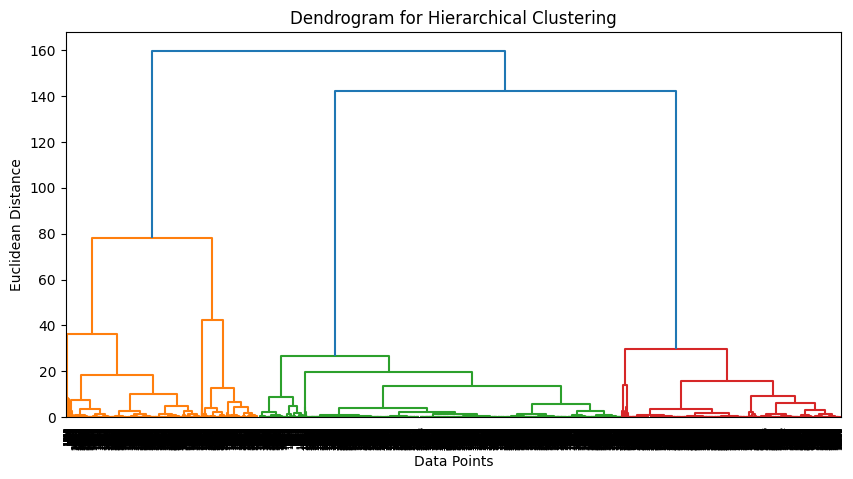

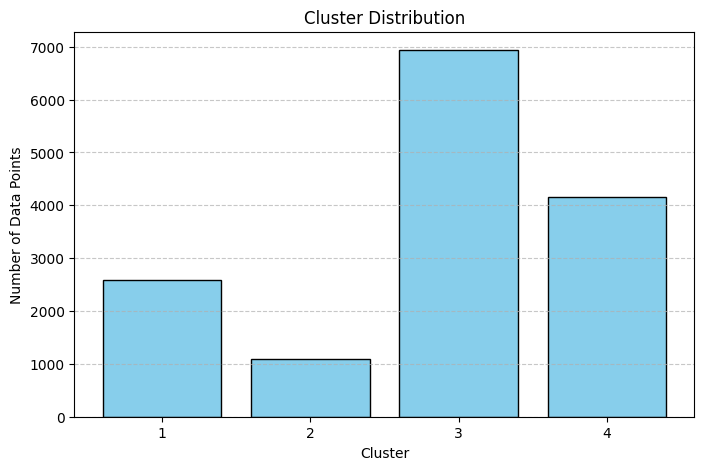

Cluster Counts:
1    2590
2    1083
3    6937
4    4161
Name: count, dtype: int64


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

data = pd.read_csv('filtered_data_normalized.csv')

linked = linkage(data, method='ward')

plt.figure(figsize=(10, 5))
dendrogram(linked)
plt.title("Dendrogram for Hierarchical Clustering")
plt.xlabel("Data Points")
plt.ylabel("Euclidean Distance")
plt.show()

n_clusters = 4
cluster_labels = fcluster(linked, n_clusters, criterion='maxclust')

cluster_counts = pd.Series(cluster_labels).value_counts().sort_index()

plt.figure(figsize=(8, 5))
plt.bar(cluster_counts.index, cluster_counts.values, color='skyblue', edgecolor='black')
plt.title("Cluster Distribution")
plt.xlabel("Cluster")
plt.ylabel("Number of Data Points")
plt.xticks(cluster_counts.index)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

print("Cluster Counts:")
print(cluster_counts)

In [ ]:
import pandas as pd
data = pd.read_csv('filtered_data_normalized.csv')

results = pd.DataFrame(data, columns=['Feature1', 'Feature2'])
results['Cluster'] = cluster_labels
results.to_csv('hierarchical_clustering_results.csv', index=False)
print("Results saved to 'hierarchical_clustering_results.csv'")

Results saved to 'hierarchical_clustering_results.csv'


In [ ]:
import pandas as pd
data = pd.read_csv('filtered_data_normalized.csv')

dist_matrix = pdist(data.values.reshape(-1, 1), metric='euclidean')
dist_matrix

array([0.05901561, 1.91710509, 0.01358199, ..., 2.67046121, 0.01382762,
       2.68428883])

In [ ]:
# Menggunakan linkage untuk membuat hierarki klaster
Z = linkage(dist_matrix, method='ward')
Z

array([[0.00000000e+00, 8.00000000e+00, 0.00000000e+00, 2.00000000e+00],
       [1.00000000e+00, 9.23000000e+02, 0.00000000e+00, 2.00000000e+00],
       [2.00000000e+00, 4.00000000e+00, 0.00000000e+00, 2.00000000e+00],
       ...,
       [5.90730000e+04, 5.90770000e+04, 3.53026380e+01, 2.05800000e+04],
       [5.90780000e+04, 5.90790000e+04, 5.26417473e+01, 8.96200000e+03],
       [5.90800000e+04, 5.90810000e+04, 2.27047729e+02, 2.95420000e+04]])

In [ ]:
# Evaluasi Hasil Klasterisasi
from sklearn.metrics import silhouette_score
score = silhouette_score(data, clusters)
print(f"Silhouette Score: {score}")

Silhouette Score: 0.8398457491656297


In [ ]:
import pandas as pd

# Membaca file CSV
data5 = pd.read_csv('hierarchical_clustering_results.csv')

# Menambahkan kolom 'label cluster' berdasarkan nilai kolom 'cluster'
data5['label cluster'] = data5['Cluster'].map({
    1: 'sangat sulit',
    2: 'sulit',
    3: 'mudah',
    4: 'normal'
})
data5

,Feature1,Feature2,Cluster,label cluster
0,NaN,NaN,3,mudah
1,NaN,NaN,4,normal
2,NaN,NaN,4,normal
3,NaN,NaN,4,normal
4,NaN,NaN,3,mudah
...,...,...,...,...
14766,NaN,NaN,1,sangat sulit
14767,NaN,NaN,2,sulit
14768,NaN,NaN,4,normal
14769,NaN,NaN,1,sangat sulit


In [ ]:
data5.to_csv("hierarchical Klaster.csv", index=False)
print("Data dengan kolom 'Klaster' berhasil disimpan ke 'Hierarchical Klaster.csv'.")

Data dengan kolom 'Klaster' berhasil disimpan ke 'Hierarchical Klaster.csv'.


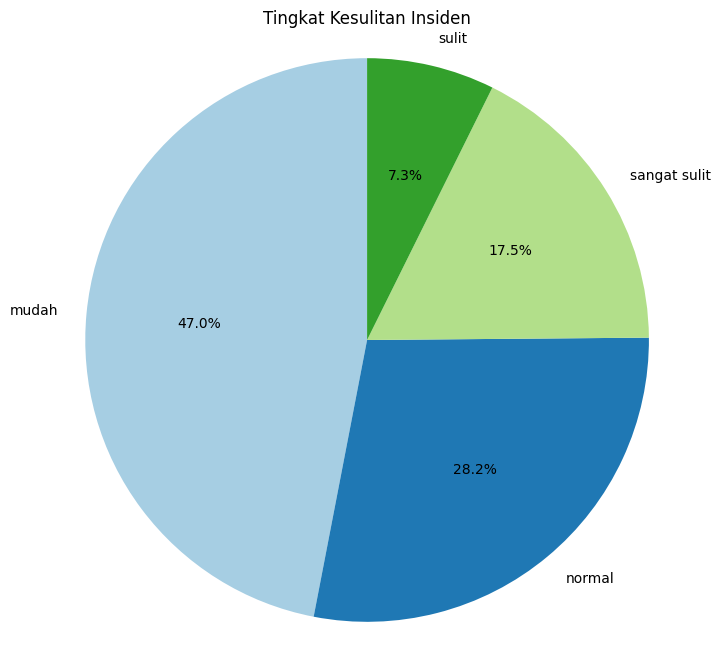

In [ ]:
import matplotlib.pyplot as plt

# Menghitung frekuensi setiap nilai di kolom 'WORKZONE'
symptom_counts = data5['label cluster'].value_counts(normalize=True)  # Normalisasi untuk mendapatkan persentase

# Konversi ke nilai absolut untuk visualisasi pie chart
symptom_counts_abs = symptom_counts * len(data5['label cluster'])

# Membuat pie chart
plt.figure(figsize=(8, 8))
plt.pie(
    symptom_counts_abs,
    labels=symptom_counts.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=plt.cm.Paired.colors
)

# Menambahkan judul
plt.title('Tingkat Kesulitan Insiden')

# Menampilkan pie chart
plt.axis('equal')  # Untuk memastikan pie chart berbentuk lingkaran
plt.show()